In [1]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
os.chdir("D:\Education\Python3\Python For ML")

In [4]:
data=pd.read_json("amsterdam.json")

In [5]:
data.head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable
0,1.0,6,1.0,2.0,1,3,4,1,$145.00,52.361173,4.866755,Entire home/apt,f
1,1.0,2,1.0,1.0,1,2,17,1,$88.00,52.370237,4.859507,Entire home/apt,f
10,1.0,2,1.0,1.0,1,3,0,1,$130.00,52.371424,4.848644,Entire home/apt,f
100,1.0,5,1.0,4.0,1,5,2,1,$90.00,52.312889,4.980151,Entire home/apt,f
1000,1.0,1,1.0,1.0,1,1,32,1,$39.00,52.395334,4.916701,Private room,t


In [6]:
data.shape

(15181, 13)

In [7]:
data.isnull().sum()

host_listings_count                3
accommodates                       0
bathrooms                         18
bedrooms                          12
guests_included                    0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
price                              0
latitude                           0
longitude                          0
room_type                          0
instant_bookable                   0
dtype: int64

In [8]:
data['price']=data['price'].str.replace("$","")

In [9]:
data['price']=data['price'].str.replace(",","")

In [10]:
data.price=pd.to_numeric(data.price)

In [11]:
np.mean(data['price'])

134.79922271260128

In [12]:
print(round(134.79922271260128,3))

134.799


In [13]:
np.max(data['price'])

3142.0

In [14]:
np.percentile(data['price'],99)

440.0

In [15]:
l=data[~(data['price'] >= 440.0)]

In [16]:
np.percentile(l['price'],90)

209.0

In [17]:
l=l.dropna()

In [18]:
l.shape

(14995, 13)

In [19]:
from math import radians, cos, sin, asin, sqrt

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [20]:
print(haversine_np(l['longitude'], l['latitude'], 4.899431, 52.379189))

0        2.987199
1        2.885443
10       3.551815
100      9.181975
1000     2.142603
10000    5.056605
10001    4.441026
10002    4.249874
10003    3.875778
10004    4.667275
10005    3.135581
10006    4.129744
10007    4.824441
10008    4.488063
10009    4.180688
1001     2.194954
10010    2.737793
10011    4.039054
10012    4.286530
10013    4.366876
10014    4.266041
10015    4.138609
10016    4.128881
10017    4.364664
10018    4.347595
10019    2.793791
1002     2.179874
10020    4.383291
10021    3.099883
10022    4.179456
           ...   
9970     4.467894
9971     4.277276
9972     4.843077
9973     4.250958
9974     4.702028
9975     2.547578
9976     2.830893
9977     4.526707
9978     4.373184
9979     4.709415
998      2.368129
9980     5.709307
9981     3.852859
9983     4.374359
9984     5.414300
9985     4.874302
9986     4.182773
9988     3.411279
9989     4.495535
999      0.680370
9990     4.187849
9991     4.341636
9992     5.686010
9993     3.096991
9994     3

In [21]:
l['d_centre']=haversine_np(l['longitude'], l['latitude'], 4.899431, 52.379189)

In [22]:
l['d_centre'].head(2)

0    2.987199
1    2.885443
Name: d_centre, dtype: float64

In [23]:
l.head(10)

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable,d_centre
0,1.0,6,1.0,2.0,1,3,4,1,145.0,52.361173,4.866755,Entire home/apt,f,2.987199
1,1.0,2,1.0,1.0,1,2,17,1,88.0,52.370237,4.859507,Entire home/apt,f,2.885443
10,1.0,2,1.0,1.0,1,3,0,1,130.0,52.371424,4.848644,Entire home/apt,f,3.551815
100,1.0,5,1.0,4.0,1,5,2,1,90.0,52.312889,4.980151,Entire home/apt,f,9.181975
1000,1.0,1,1.0,1.0,1,1,32,1,39.0,52.395334,4.916701,Private room,t,2.142603
10000,1.0,3,1.0,2.0,1,2,3,1,118.0,52.347202,4.846432,Entire home/apt,f,5.056605
10001,34.0,4,1.0,2.0,1,2,5,31,129.0,52.344071,4.868194,Entire home/apt,t,4.441026
10002,1.0,4,1.0,3.0,1,2,10,1,130.0,52.345653,4.869328,Entire home/apt,t,4.249874
10003,1.0,4,1.0,1.0,1,3,16,1,135.0,52.347393,4.875956,Private room,f,3.875778
10004,1.0,2,1.0,1.0,1,1,0,1,94.0,52.350096,4.849824,Entire home/apt,f,4.667275


In [24]:
l.sort_values('d_centre').head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable,d_centre
3158,1.0,2,1.5,1.0,1,1,0,1,85.0,52.378546,4.900775,Private room,f,0.115801
3168,1.0,4,1.0,1.0,1,1,0,1,41.0,52.378850,4.901433,Shared room,f,0.140946
2639,1.0,4,1.0,1.0,2,3,27,1,159.0,52.379089,4.897293,Entire home/apt,f,0.145468
3010,4.0,2,1.0,1.0,1,1,4,4,150.0,52.378549,4.896679,Private room,t,0.199767
1860,1.0,2,1.0,1.0,1,1,9,1,120.0,52.378398,4.896674,Private room,f,0.206638


In [25]:
l.sort_values('d_centre')[['price','d_centre']].head()

,price,d_centre
3158,85.0,0.115801
3168,41.0,0.140946
2639,159.0,0.145468
3010,150.0,0.199767
1860,120.0,0.206638


In [26]:
l[l['d_centre']>=1].groupby("room_type").agg({'price':np.mean})

,price
room_type,
Entire home/apt,140.234116
Private room,83.833557
Shared room,88.821429


In [27]:
## create the Regression tree
X=l.drop(["price"], axis=1)

In [28]:
X.head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,latitude,longitude,room_type,instant_bookable,d_centre
0,1.0,6,1.0,2.0,1,3,4,1,52.361173,4.866755,Entire home/apt,f,2.987199
1,1.0,2,1.0,1.0,1,2,17,1,52.370237,4.859507,Entire home/apt,f,2.885443
10,1.0,2,1.0,1.0,1,3,0,1,52.371424,4.848644,Entire home/apt,f,3.551815
100,1.0,5,1.0,4.0,1,5,2,1,52.312889,4.980151,Entire home/apt,f,9.181975
1000,1.0,1,1.0,1.0,1,1,32,1,52.395334,4.916701,Private room,t,2.142603


In [29]:
X.shape

(14995, 13)

In [30]:
X=pd.get_dummies(X)

In [31]:
X.shape

(14995, 16)

In [32]:
X.head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,latitude,longitude,d_centre,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,instant_bookable_f,instant_bookable_t
0,1.0,6,1.0,2.0,1,3,4,1,52.361173,4.866755,2.987199,1,0,0,1,0
1,1.0,2,1.0,1.0,1,2,17,1,52.370237,4.859507,2.885443,1,0,0,1,0
10,1.0,2,1.0,1.0,1,3,0,1,52.371424,4.848644,3.551815,1,0,0,1,0
100,1.0,5,1.0,4.0,1,5,2,1,52.312889,4.980151,9.181975,1,0,0,1,0
1000,1.0,1,1.0,1.0,1,1,32,1,52.395334,4.916701,2.142603,0,1,0,0,1


In [33]:
y=l['price']

In [34]:
y.head()

0       145.0
1        88.0
10      130.0
100      90.0
1000     39.0
Name: price, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=200)

# Random Forest Regressor

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
clf=RandomForestRegressor(n_estimators=80,oob_score=True,n_jobs=-1,random_state=200, max_features="sqrt")

In [38]:
clf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
           oob_score=True, random_state=200, verbose=0, warm_start=False)

In [39]:
clf.oob_score_

0.5461813197830467

In [40]:
for w in range(30,600,10):
    clf=RandomForestRegressor(n_estimators=w,oob_score=True,n_jobs=-1,random_state=200, max_features="sqrt")
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    print ('For n_estimators = '+str(w))
    print ('OOB score is '+str(oob))
    print ('************************')
       

For n_estimators = 30
OOB score is 0.5132245816497552
************************
For n_estimators = 40
OOB score is 0.526270795688782
************************
For n_estimators = 50
OOB score is 0.5333232911237602
************************
For n_estimators = 60
OOB score is 0.5405961537825958
************************
For n_estimators = 70
OOB score is 0.5420363788951965
************************
For n_estimators = 80
OOB score is 0.5461813197830467
************************
For n_estimators = 90
OOB score is 0.5483596574139585
************************
For n_estimators = 100
OOB score is 0.5493139643717164
************************
For n_estimators = 110
OOB score is 0.5502816635374528
************************
For n_estimators = 120
OOB score is 0.550892641651252
************************
For n_estimators = 130
OOB score is 0.5517780010622242
************************
For n_estimators = 140
OOB score is 0.5523052994353215
************************
For n_estimators = 150
OOB score is 0.55211057525

In [42]:
#Finalize 190 trees
reg=RandomForestRegressor(n_estimators=590,oob_score=True,n_jobs=-1,random_state=200, max_features="sqrt")

In [43]:
reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=590, n_jobs=-1,
           oob_score=True, random_state=200, verbose=0, warm_start=False)

In [44]:
reg.oob_score_

0.5580564141489613

In [45]:
reg.feature_importances_

array([0.02157493, 0.18648566, 0.04842118, 0.12565928, 0.05525327,
       0.03652481, 0.06216266, 0.02460587, 0.10744145, 0.11450152,
       0.12733741, 0.04146585, 0.03397432, 0.00072571, 0.00705971,
       0.00680636])

In [46]:
imp_feat=pd.Series(reg.feature_importances_,index=X.columns.tolist())

In [47]:
imp_feat.sort_values(ascending=False)

accommodates                      0.186486
d_centre                          0.127337
bedrooms                          0.125659
longitude                         0.114502
latitude                          0.107441
number_of_reviews                 0.062163
guests_included                   0.055253
bathrooms                         0.048421
room_type_Entire home/apt         0.041466
minimum_nights                    0.036525
room_type_Private room            0.033974
calculated_host_listings_count    0.024606
host_listings_count               0.021575
instant_bookable_f                0.007060
instant_bookable_t                0.006806
room_type_Shared room             0.000726
dtype: float64

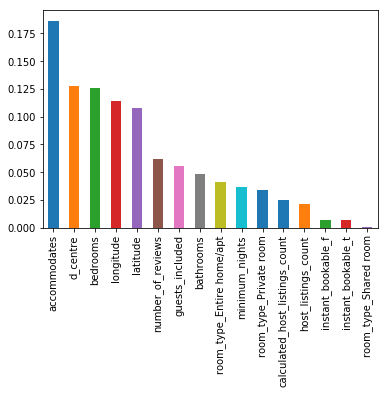

In [48]:
imp_feat.sort_values(ascending=False).plot(kind='bar')